<a href="https://colab.research.google.com/github/Cheetah-lhp/MachineLearning/blob/main/So_s%C3%A1nh_Softmax%2C_Perceptron%2C_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression, Perceptron
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_openml
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler

In [14]:
mnist = fetch_openml('mnist_784', version =1, as_frame=False)
X,y = mnist.data, mnist.target
X_train,X_test = X[:8000], X[8001:10000]
y_train, y_test = y[:8000], y[8001:10000]


In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
per = Perceptron()
per.fit(X_train, y_train)
print('accuracy =',per.score(X_test, y_test))

#Logis = LogisticRegression(multi_class='ovr',penalty=None)
Logis = OneVsRestClassifier(LogisticRegression(penalty=None, max_iter=1000))
Logis.fit(X_train, y_train)
print('accuracy =',Logis.score(X_test, y_test))

Sofmax = LogisticRegression(multi_class='multinomial')
Sofmax.fit(X_train, y_train)
print('accuracy =',Sofmax.score(X_test, y_test))

accuracy = 0.8554277138569285
accuracy = 0.8489244622311155


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


accuracy = 0.8834417208604303


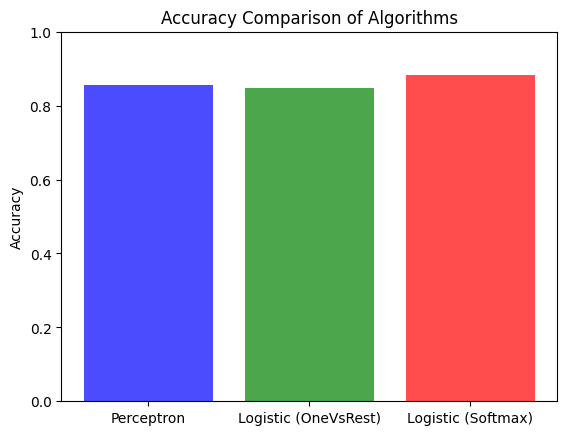

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already trained the models and calculated their accuracies:
per_acc = per.score(X_test, y_test)
logis_acc = Logis.score(X_test, y_test)
softmax_acc = Sofmax.score(X_test, y_test)

# Create a list of algorithm names
algorithms = ['Perceptron', 'Logistic (OneVsRest)', 'Logistic (Softmax)']

# Create a list of accuracies for each algorithm
accuracies = [per_acc, logis_acc, softmax_acc]

# Create the bar chart
plt.bar(algorithms, accuracies, color=['blue', 'green', 'red'], alpha=0.7)

# Customize the chart
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Algorithms')
plt.ylim([0, 1])  # Set y-axis limits for better visualization

plt.show()